Toying with network representation and trying to get a more general solution with unpaired domains.   Hairpins can be turned into a single node, as they are tying together 3 domains in an intransmuteable way

In [78]:
import numpy as np
import re
import networkx as nx
from matplotlib import pyplot as plt

In [85]:
def create_graph_from_string(string):
    #separate domains/count
    pattern = re.compile('@?-?[0-9]* ?[a-z|A-Z|0-9|\*]+[ \(]? ?\+?|\) ?\+?')
    dom_raw_list = pattern.findall(string)
    dom_count = len(dom_raw_list)
    
    name_list1 = []
    
    #loop through the raw domains, extract  
    for dom_i in range(len(dom_raw_list)):
        dom = dom_raw_list[dom_i]
        dom = dom.strip()
        
        #fill table
        if re.search("\s", dom):
            dom_parts = re.split("\s", dom)
            
            for segm in dom_parts:
                if re.search("[@+]", segm) is None:
                    name_list1.append(segm) #only keep the name part further
        else:
            name_list1.append(dom)
  
    #pairedness dictionary
    paired_dict = {}
    
    for dom_i in range(len(dom_raw_list)):
        if re.search("\(", dom_raw_list[dom_i]):
            bracket_count = 1
            for next_dom in range(dom_i+1, len(dom_raw_list)):
                if re.search("\(", dom_raw_list[next_dom]):
                    bracket_count += 1
                elif re.search("\)", dom_raw_list[next_dom]):
                    bracket_count -= 1
                if bracket_count == 0:
                    paired_dict[dom_i] = next_dom
                    break
    
    #
    name_final = []
    
    for dom_i3 in range(len(name_list1)):
        #paireds
        if re.search("\(", name_list1[dom_i3]):
            name = name_list1[dom_i3].strip("(+ ")

        #correcting closing bracket name
        elif re.search("\)", name_list1[dom_i3]):
            index_of_pair = list(paired_dict.keys())[list(paired_dict.values()).index(dom_i3)]
            if re.search("\*", name_list1[index_of_pair]):
                name = name_list1[index_of_pair].strip("\(").strip("\*")
            else:
                name = name_list1[index_of_pair].strip("\(") + "*"
        
        else:
            name = name_list1[dom_i3].strip("+ ")
        
        name_final.append(name)
        
        
    #append edges to graph
    G = nx.DiGraph()
    
    for dom_to_dom in range(len(name_final)-1):
        if re.search("\+", dom_raw_list[dom_to_dom]) is None:
            G.add_edge(name_final[dom_to_dom], name_final[dom_to_dom+1], color='r')
    for pair in paired_dict:
        G.add_edge(name_final[pair], name_final[paired_dict[pair]], color='g')
                         
    return G

In [95]:
def draw_skeleton(G):
    pos = nx.kamada_kawai_layout(G)
    colors = [G[u][v]['color'] for u,v in G.edges()]
    plt.figure(figsize=(16,9))

    nx.draw_networkx(G, pos = pos, with_label = True, node_size=600,font_size=15, edge_color=colors, 
                     node_color='y', width=2)

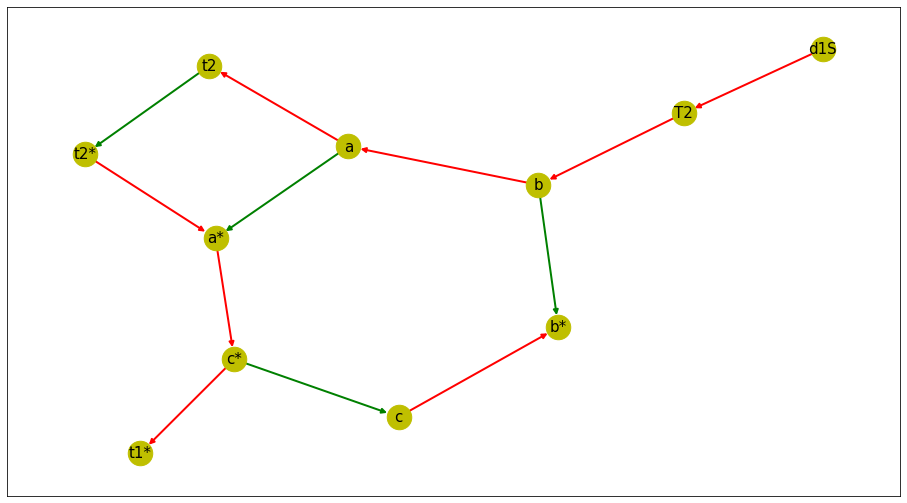

In [96]:
string = "@-45 d1S T2 @-135 b( a( t2( + ) ) c*( t1* + ) )"

G = create_graph_from_string(string)
draw_skeleton(G)

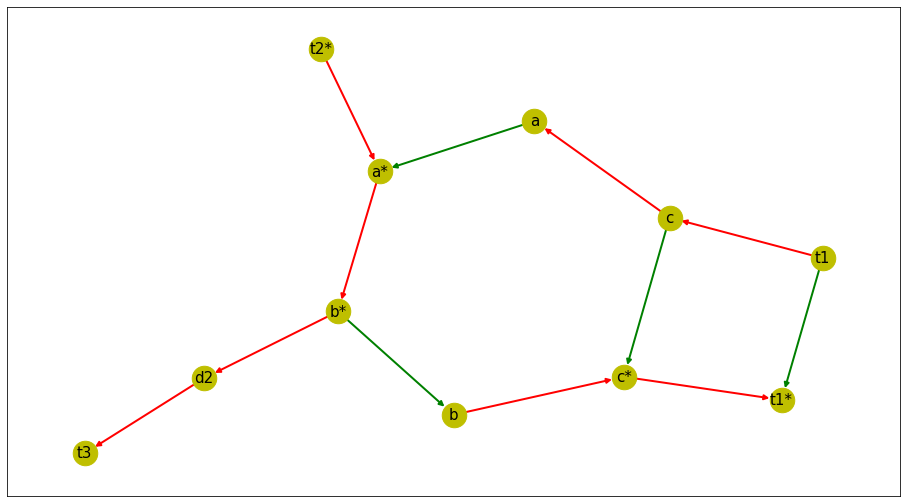

In [90]:
string = "t1( c( a( + t2* ) b*( d2 t3 + ) ) )"

G = create_graph_from_string(string)
draw_skeleton(G)

In the previous two examples we see a hexagon of pairings, which indicates a certain 'three-way crossroad' type of formulation of paired domains

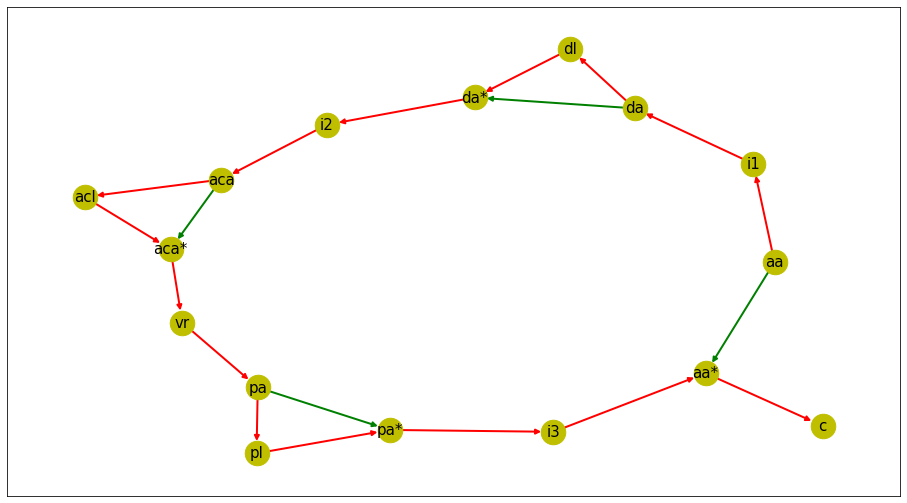

In [97]:
string = "@-90 aa( @-135 i1 @-90 da( dl ) @-135 i2 @-90 aca( acl ) @-135 vr @-135 pa( pl ) @-135 i3 ) @0 c"

G = create_graph_from_string(string)
draw_skeleton(G)

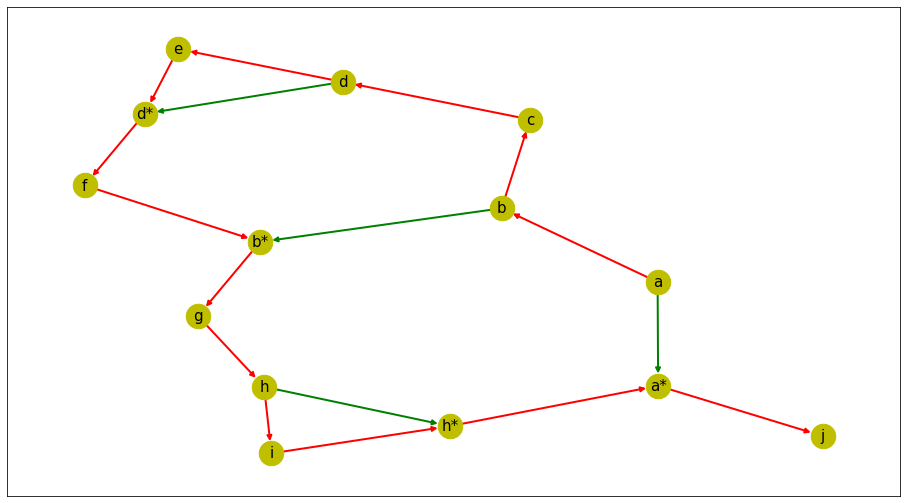

In [93]:
string = "a( b( c d( e ) f ) g h( i ) ) j"

G = create_graph_from_string(string)
draw_skeleton(G)

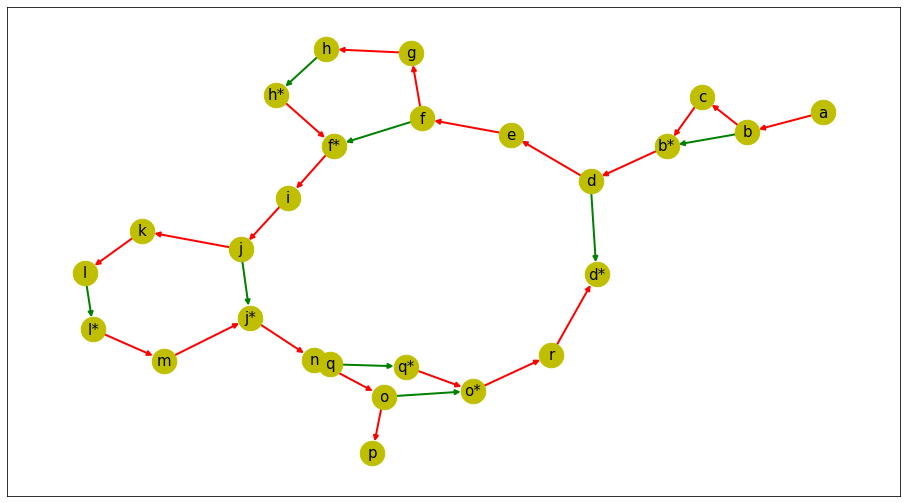

In [100]:
#this one looks bit buggy with n-q

string = "a b( c ) d( e f( g h( + ) ) i j( k l( + ) m ) n o( p + q( + ) ) r )"
G = create_graph_from_string(string)
draw_skeleton(G)

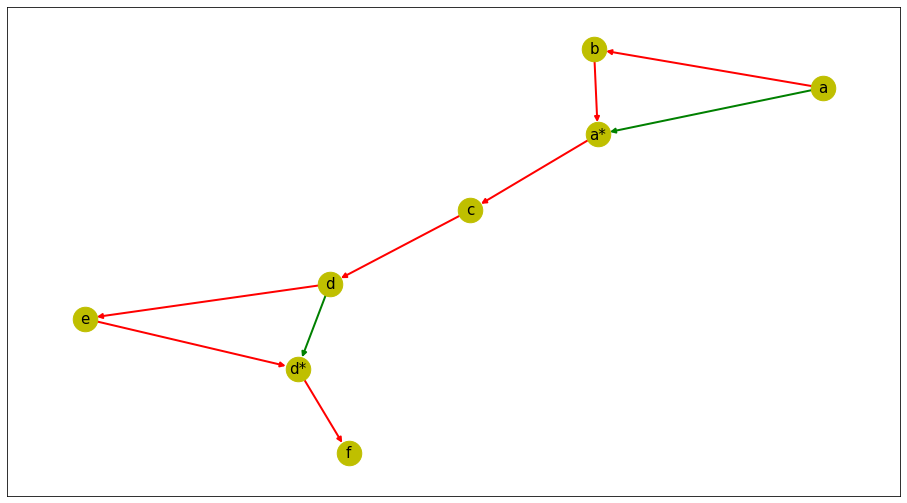

In [99]:
string = "@-90 a( b ) @-90 c @90 d( e ) @90 f"
G = create_graph_from_string(string)
draw_skeleton(G)